### BikeRentData
##### Problem Statement: To predict the number of bikes will be booked in future on given Parameters
##### Target Variable: cnt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Exploration

In [2]:
BikeRentData=pd.read_csv('C:/Users/ESHWAR NANI/Downloads/Python Datasets/Python Datasets/Regression Datasets/BikeRentData.csv') 

In [3]:
print('BikeRentdata before deleting duplicate rows: ',BikeRentData.shape)
BikeRentData=BikeRentData.drop_duplicates()
print('BikeRentData after deleting duplicate rows: ',BikeRentData.shape)

BikeRentdata before deleting duplicate rows:  (17379, 15)
BikeRentData after deleting duplicate rows:  (17379, 15)


In [4]:
BikeRentData.head(5)

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [5]:
BikeRentData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.1 MB


In [6]:
BikeRentData.describe(include='all')

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


##### distribution of the target variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1663F10C8>]],
      dtype=object)

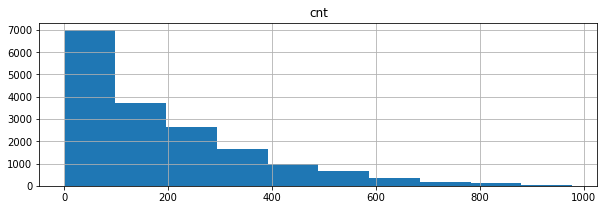

In [7]:
BikeRentData.hist(['cnt'],figsize=[10,3])

In [8]:
BikeRentData.nunique()

Unnamed: 0    17379
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
registered      776
cnt             869
dtype: int64

### EDA

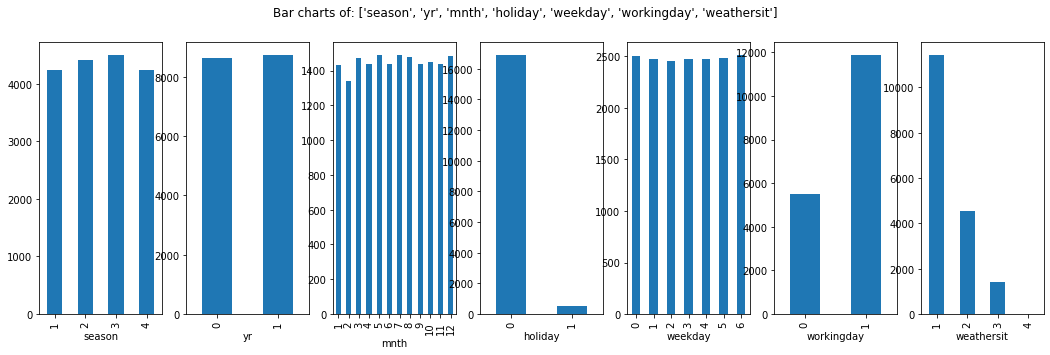

In [9]:
def PlotBarCharts(inpData, colsToPlot):
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=BikeRentData, colsToPlot=['season','yr','mnth','holiday','weekday','workingday','weathersit'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B167088548>,
      dtype=object)

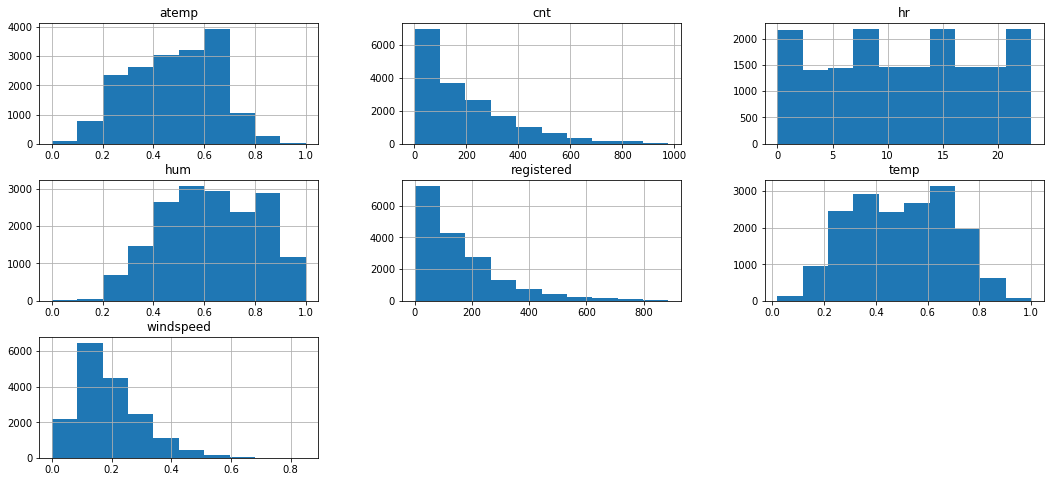

In [10]:
BikeRentData.hist(['hr','temp','atemp','hum','windspeed','registered','cnt'],figsize=(18,8))

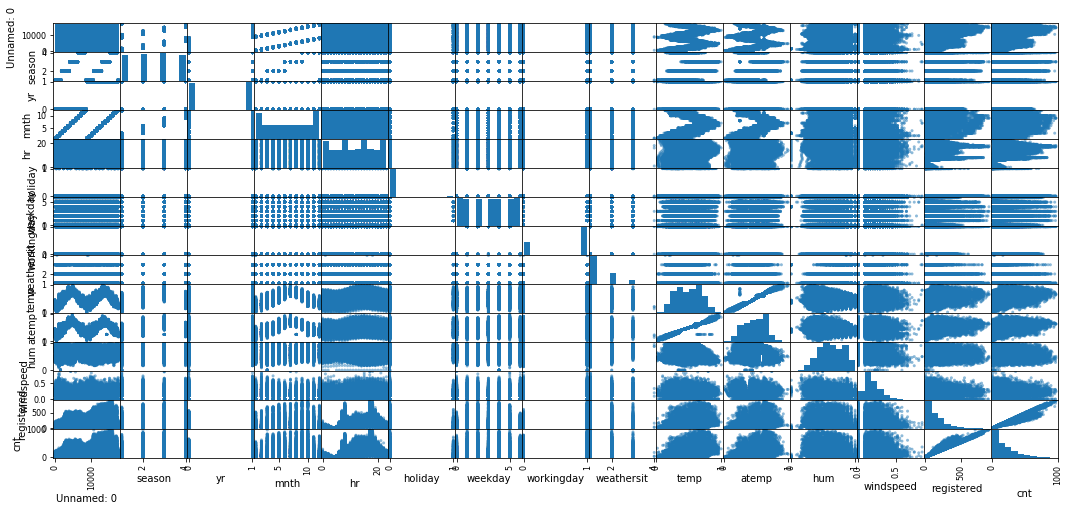

In [11]:
FullDataPlot = pd.plotting.scatter_matrix(BikeRentData, figsize=(18,8))

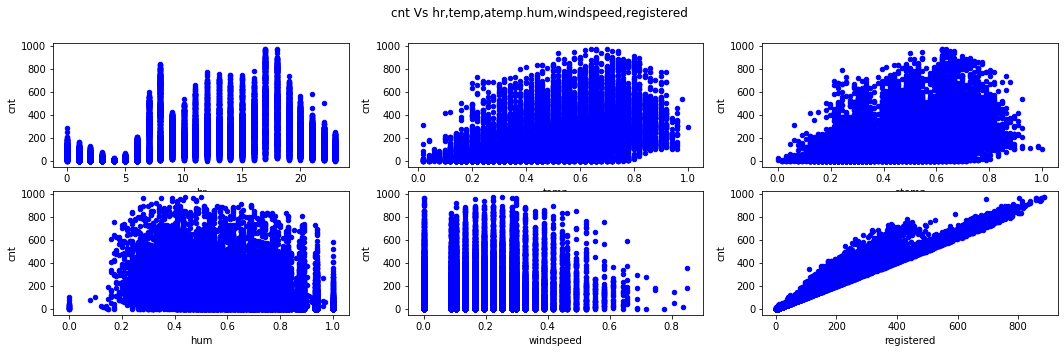

In [12]:
# Generating multiple subplots
fig, subPlot=plt.subplots(nrows=2, ncols=3, figsize=(18,5))

# Creating the super title of the charts
fig.suptitle('cnt Vs hr,temp,atemp.hum,windspeed,registered')

# Generating multiple scatter charts
BikeRentData.plot.scatter(x='hr', y='cnt', marker='o', color='blue', ax=subPlot[0,0])
BikeRentData.plot.scatter(x='temp', y='cnt', marker='o', color='blue', ax=subPlot[0,1])
BikeRentData.plot.scatter(x='atemp', y='cnt', marker='o', color='blue', ax=subPlot[0,2])
BikeRentData.plot.scatter(x='hum', y='cnt', marker='o', color='blue', ax=subPlot[1,0])
BikeRentData.plot.scatter(x='windspeed', y='cnt', marker='o', color='blue', ax=subPlot[1,1])
BikeRentData.plot.scatter(x='registered', y='cnt', marker='o', color='blue', ax=subPlot[1,2])


In [13]:
CorrelationData=BikeRentData.corr()
CorrelationData

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
Unnamed: 0,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.335361,0.404772


In [14]:
CorrelationData['cnt'][abs(CorrelationData['cnt']) > 0.5 ]

registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [15]:
GroupedData = BikeRentData.groupby(['yr'])
GroupedData.mean()

,Unnamed: 0,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
yr,,,,,,,,,,,,,,
0,4323.0,2.513592,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,0.489069,0.469000,0.643430,0.191172,115.193869,143.794448
1,13012.5,2.489810,6.501946,11.520151,0.029883,2.994733,0.681704,1.413098,0.504825,0.482481,0.611193,0.189034,191.986604,234.666361


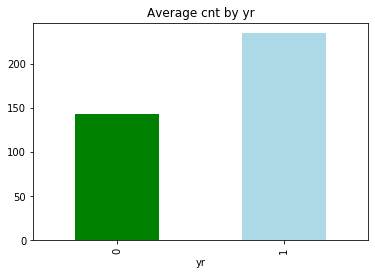

In [16]:
GroupedData.mean()['cnt'].plot(kind='bar', title='Average cnt by yr', color=['green','lightblue'])

In [17]:
from scipy.stats import f_oneway
CategoryGroupLists=BikeRentData.groupby('yr')['cnt'].apply(list)
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  7.213184208630547e-247


In [18]:
CategoryGroupLists=BikeRentData.groupby('season')['cnt'].apply(list)
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  7.40107139971279e-257


In [19]:
CategoryGroupLists=BikeRentData.groupby('mnth')['cnt'].apply(list)
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  5.505684936484358e-284


In [20]:
CategoryGroupLists=BikeRentData.groupby('weekday')['cnt'].apply(list)
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0018990310434750582


In [21]:
CategoryGroupLists=BikeRentData.groupby('workingday')['cnt'].apply(list)
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  6.524264547051995e-05


In [22]:
CategoryGroupLists=BikeRentData.groupby('holiday')['cnt'].apply(list)
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  4.5461689487233316e-05


In [23]:
CategoryGroupLists=BikeRentData.groupby('weathersit')['cnt'].apply(list)
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  1.7347820521803117e-81


In [24]:
from scipy.stats import f_oneway
def FunctionAnova(inpData,targetVar,categoricalPredictors):
    for predictors in categoricalPredictors:
        CategoryGroupLists=inpData.groupby(predictors)[targetVar].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        print('P-Value for Anova is: ', AnovaResults)


FunctionAnova(inpData=BikeRentData, targetVar='cnt', categoricalPredictors=['holiday','weathersit','workingday','yr','season','mnth','weekday'] )     
        
        

P-Value for Anova is:  F_onewayResult(statistic=16.636980484977737, pvalue=4.5461689487233316e-05)
P-Value for Anova is:  F_onewayResult(statistic=127.17386949967266, pvalue=1.7347820521803117e-81)
P-Value for Anova is:  F_onewayResult(statistic=15.95182279420313, pvalue=6.524264547051995e-05)
P-Value for Anova is:  F_onewayResult(statistic=1163.3651667050667, pvalue=7.213184208630547e-247)
P-Value for Anova is:  F_onewayResult(statistic=409.1810372630525, pvalue=7.40107139971279e-257)
P-Value for Anova is:  F_onewayResult(statistic=128.1021897089323, pvalue=5.505684936484358e-284)
P-Value for Anova is:  F_onewayResult(statistic=3.487790047928153, pvalue=0.0018990310434750582)


#### Data preprocessing

In [25]:

BikeRentData.isnull().sum()

Unnamed: 0    0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

In [26]:
BikeRentData[['cnt','registered']].corr()

,cnt,registered
cnt,1.000000,0.972151
registered,0.972151,1.000000


In [27]:
BikeRentDataNumeric=pd.get_dummies(BikeRentData)
BikeRentDataNumeric.head()

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [28]:
BikeRentDataNumeric.to_pickle('BikeRentDataNumeric.pkl')

In [29]:
BikeRentDataNumeric.columns

Index(['Unnamed: 0', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'registered', 'cnt'],
      dtype='object')

In [30]:
BikeRentDataNumeric.to_excel('BikeRentData.xlsx')

In [31]:
import numpy as np
import pandas as pd

In [32]:
BikeRentDataNumeric = pd.read_pickle('BikeRentDataNumeric.pkl')

In [33]:
BikeRentDataNumeric.columns

Index(['Unnamed: 0', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'registered', 'cnt'],
      dtype='object')

### Splitting the data for algorithms

In [34]:
Targetvariable = 'cnt'
Predictors = ['registered']

X = BikeRentDataNumeric[Predictors].values
y = BikeRentDataNumeric[Targetvariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13903, 1)
(13903,)
(3476, 1)
(3476,)


In [36]:
X_train[0:5]

array([[ 54],
       [453],
       [  3],
       [101],
       [  1]], dtype=int64)

### Linear regression

In [37]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Targetvariable]=y_test
TestingDataResults[('Predicted'+Targetvariable)]=np.round(prediction)
TestingDataResults['APE']=100* ((abs(TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])
MAPE=np.mean(TestingDataResults['APE'])
Accuracy = 100 - MAPE

MedianMAPE=np.median(TestingDataResults['APE'])



MedianAccuracy=100- MedianMAPE
print('Mean Accuracy:', Accuracy)
print('Median Accuracy:', MedianAccuracy)
TestingDataResults.head()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Value: 0.9447428287139775
Accuracy on Test Data: 49.625527979525565
Mean Accuracy: 49.42478406282332
Median Accuracy: 84.13325656861718


,registered,cnt,Predictedcnt,APE
0,240,425,290.0,31.764706
1,83,88,107.0,21.590909
2,3,4,14.0,250.000000
3,457,526,543.0,3.231939
4,8,13,20.0,53.846154


In [38]:
print('The value of slope is: ',LREG.coef_)
print('The value of Intercept is: ',LREG.intercept_)

The value of slope is:  [1.16495786]
The value of Intercept is:  10.50406195577088


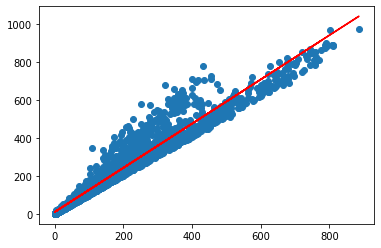

In [39]:
# Visualizing the line of best fit
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['registered'] , y=TestingDataResults['cnt'])
plt.plot(TestingDataResults['registered'] , TestingDataResults['Predictedcnt'], color='red')

In [86]:
# Separate Target Variable and Predictor Variables
TargetVariable='cnt'
Predictors=[ 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'registered']
X=BikeRentDataNumeric[Predictors].values
y=BikeRentDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12165, 13)
(12165,)
(5214, 13)
(5214,)


In [42]:
X_train[0:3]

array([[  2.    ,   1.    ,   4.    ,   2.    ,   0.    ,   3.    ,
          1.    ,   2.    ,   0.5   ,   0.4848,   0.42  ,   0.194 ,
          8.    ],
       [  4.    ,   0.    ,   9.    ,  12.    ,   0.    ,   1.    ,
          1.    ,   2.    ,   0.68  ,   0.6364,   0.79  ,   0.1642,
        161.    ],
       [  2.    ,   1.    ,   4.    ,   0.    ,   0.    ,   3.    ,
          1.    ,   1.    ,   0.34  ,   0.303 ,   0.36  ,   0.4179,
         22.    ]])

### MLR

In [43]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=100* ((abs(TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])
MAPE=np.mean(TestingDataResults['APE'])
Accuracy = 100 - MAPE

MedianMAPE=np.median(TestingDataResults['APE'])



MedianAccuracy=100- MedianMAPE
print('Mean Accuracy:', Accuracy)
print('Median Accuracy:', MedianAccuracy)
TestingDataResults.head()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Value: 0.9665811587945158
Accuracy on Test Data: 19.74769883151849
Mean Accuracy: 19.80260638771537
Median Accuracy: 87.4015748031496


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,Predictedcnt,APE
0,3.0,1.0,6.0,19.0,0.0,6.0,0.0,1.0,0.80,0.6970,0.27,0.1940,240.0,425,361.0,15.058824
1,1.0,1.0,1.0,20.0,1.0,1.0,0.0,1.0,0.24,0.2273,0.41,0.2239,83.0,88,118.0,34.090909
2,4.0,0.0,10.0,2.0,0.0,5.0,1.0,1.0,0.32,0.3030,0.66,0.2836,3.0,4,-16.0,500.000000
3,2.0,1.0,5.0,19.0,0.0,2.0,1.0,1.0,0.78,0.7121,0.52,0.3582,457.0,526,549.0,4.372624
4,1.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.26,0.2273,0.56,0.3881,8.0,13,-10.0,176.923077


In [44]:
# Suppress the scientific notation in values
np.set_printoptions(suppress=True)

In [45]:
print('The value of slope is: ',LREG.coef_)
print('The value of Intercept is: ',LREG.intercept_)

The value of slope is:  [ -0.77798517   1.7855525    0.00061994   0.45110758 -12.03032928
   0.59262467 -40.27017333   2.25833736  40.52190342  51.66774495
 -53.29135501   0.04376307   1.11813242]
The value of Intercept is:  24.86872119684361


In [46]:
TestingDataResults['APE']= np.abs((y_test - prediction) / y_test) * 100

# Printing the top 10 errors made by the model
TestingDataResults.sort_values(by='APE', ascending=False).head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,Predictedcnt,APE
3082,1.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,0.14,0.1515,0.86,0.1343,1.0,1,-42.0,4344.621654
4186,1.0,0.0,3.0,4.0,0.0,1.0,1.0,1.0,0.20,0.1515,0.80,0.5224,0.0,1,-38.0,3920.036330
4391,1.0,0.0,3.0,3.0,0.0,1.0,1.0,1.0,0.20,0.1515,0.80,0.5821,1.0,1,-38.0,3853.072581
3110,2.0,0.0,3.0,3.0,0.0,4.0,1.0,2.0,0.28,0.2727,1.00,0.1940,0.0,1,-37.0,3756.200453
4753,1.0,0.0,2.0,3.0,0.0,3.0,1.0,3.0,0.22,0.2273,0.93,0.1343,1.0,1,-34.0,3505.004182
332,2.0,1.0,4.0,5.0,0.0,6.0,0.0,1.0,0.50,0.4848,0.82,0.2537,1.0,1,36.0,3491.020480
3414,1.0,0.0,3.0,5.0,0.0,1.0,1.0,1.0,0.20,0.1818,0.75,0.3582,1.0,1,-32.0,3340.820878
2286,1.0,0.0,3.0,4.0,0.0,3.0,1.0,1.0,0.20,0.2121,0.75,0.1343,0.0,1,-31.0,3223.646532
2368,4.0,0.0,12.0,3.0,0.0,5.0,1.0,1.0,0.22,0.2727,0.80,0.0000,1.0,1,-30.0,3144.150894
594,1.0,0.0,2.0,3.0,0.0,2.0,1.0,3.0,0.28,0.2727,0.93,0.1642,1.0,1,-30.0,3086.432814


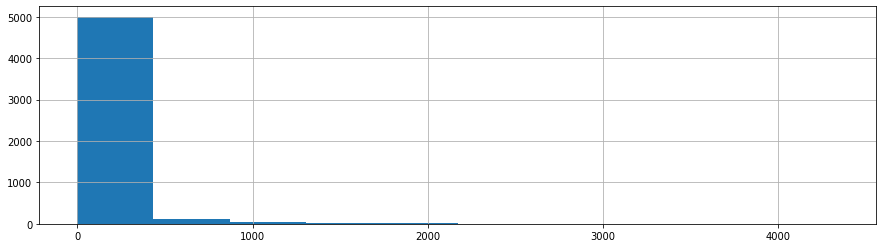

In [47]:
# Looking at the distribution of errors
TestingDataResults['APE'].hist(figsize=(15,4))

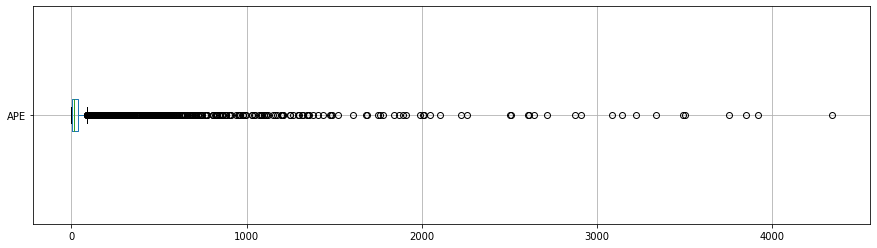

In [48]:
# Looking at the boxplot of APE to see the distribution of errors
TestingDataResults.boxplot(column='APE',figsize=(15,4), vert=False)

### Decision Trees

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
R2 Value: 0.9881029743896835
Accuracy 89.19396009484183


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,Predictedcnt
0,3.0,1.0,6.0,19.0,0.0,6.0,0.0,1.0,0.80,0.6970,0.27,0.1940,240.0,425,380.0
1,1.0,1.0,1.0,20.0,1.0,1.0,0.0,1.0,0.24,0.2273,0.41,0.2239,83.0,88,93.0
2,4.0,0.0,10.0,2.0,0.0,5.0,1.0,1.0,0.32,0.3030,0.66,0.2836,3.0,4,4.0
3,2.0,1.0,5.0,19.0,0.0,2.0,1.0,1.0,0.78,0.7121,0.52,0.3582,457.0,526,530.0
4,1.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.26,0.2273,0.56,0.3881,8.0,13,12.0


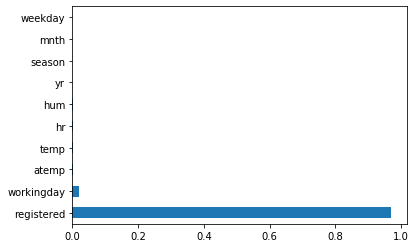

In [49]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=8,criterion='mse')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

In [50]:
np.var(y_train)

33450.00081847606

In [51]:
# Mean value number in the root node
np.mean(y_train)

191.23764899301275

In [52]:
# Adding graphviz path to the PATH env variable
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\ESHWAR NANI\\anaconda3\\Lib\\site-packages\\graphviz-2.38\\release\\bin'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.827136 to fit



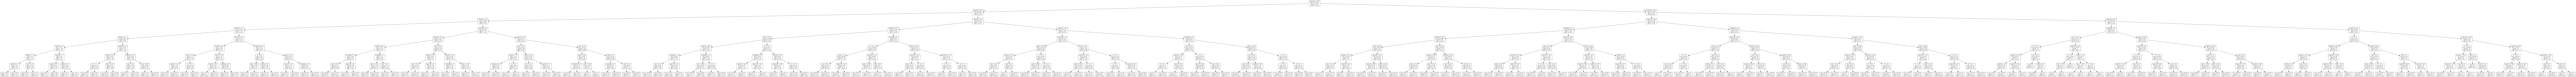

In [53]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

### Random Forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
R2 value:  0.9948964168561698
Accuracy:  90.88045759146345
Mean Accuracy: 91.06225575311366
Median Accuracy: 94.39252336448598


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,Predictedcnt,APE
0,3.0,1.0,6.0,19.0,0.0,6.0,0.0,1.0,0.80,0.6970,0.27,0.1940,240.0,425,377.0,11.294118
1,1.0,1.0,1.0,20.0,1.0,1.0,0.0,1.0,0.24,0.2273,0.41,0.2239,83.0,88,93.0,5.681818
2,4.0,0.0,10.0,2.0,0.0,5.0,1.0,1.0,0.32,0.3030,0.66,0.2836,3.0,4,4.0,0.000000
3,2.0,1.0,5.0,19.0,0.0,2.0,1.0,1.0,0.78,0.7121,0.52,0.3582,457.0,526,522.0,0.760456
4,1.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.26,0.2273,0.56,0.3881,8.0,13,9.0,30.769231


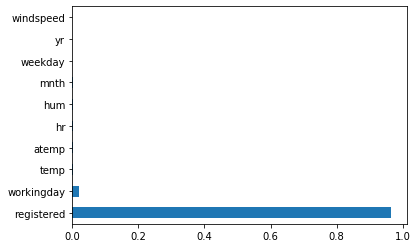

In [87]:
from sklearn.ensemble import RandomForestRegressor
RegModel=RandomForestRegressor(max_depth=10,n_estimators=500,criterion='mse')
print(RegModel)
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)
from sklearn import metrics
print('R2 value: ',metrics.r2_score(y_train,RF.predict(X_train)))

#accuracy
print('Accuracy: ',100-(np.mean(np.abs((y_test-prediction)/y_test))*100))

#feature importance chart
feature_importances = pd.Series(RF.feature_importances_,index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#printing values of predictio
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=100* ((abs(TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])
MAPE=np.mean(TestingDataResults['APE'])
Accuracy = 100 - MAPE

MedianMAPE=np.median(TestingDataResults['APE'])



MedianAccuracy=100- MedianMAPE
print('Mean Accuracy:', Accuracy)
print('Median Accuracy:', MedianAccuracy)
TestingDataResults.head()

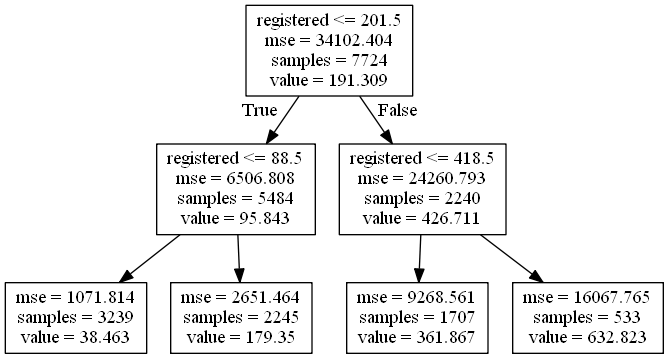

In [55]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[20] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

### AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,Predictedcnt,APE
0,3.0,1.0,6.0,19.0,0.0,6.0,0.0,1.0,0.80,0.6970,0.27,0.1940,240.0,425,384.0,9.647059
1,1.0,1.0,1.0,20.0,1.0,1.0,0.0,1.0,0.24,0.2273,0.41,0.2239,83.0,88,96.0,9.090909
2,4.0,0.0,10.0,2.0,0.0,5.0,1.0,1.0,0.32,0.3030,0.66,0.2836,3.0,4,4.0,0.000000
3,2.0,1.0,5.0,19.0,0.0,2.0,1.0,1.0,0.78,0.7121,0.52,0.3582,457.0,526,514.0,2.281369
4,1.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.26,0.2273,0.56,0.3881,8.0,13,10.0,23.076923


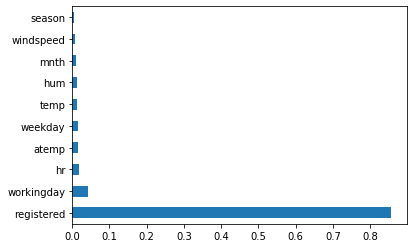

In [88]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(max_depth=10)
RegModel=AdaBoostRegressor(n_estimators=500,base_estimator=DTR,learning_rate=0.1)
print(RegModel)

#Fit the model
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

#R2 value
from sklearn import metrics
print('R2 value: ',metrics.r2_score(y_train,AB.predict(X_train)))

#Accuracy
print('Accuracy: ',100-(np.mean(np.abs((y_test-prediction)/y_test))*100))

#feature importance chart
feature_importances = pd.Series(AB.feature_importances_,index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#printing some testing results
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=100* ((abs(TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])
MAPE=np.mean(TestingDataResults['APE'])
Accuracy = 100 - MAPE

MedianMAPE=np.median(TestingDataResults['APE'])



MedianAccuracy=100- MedianMAPE
print('Mean Accuracy:', Accuracy)
print('Median Accuracy:', MedianAccuracy)
TestingDataResults.head()

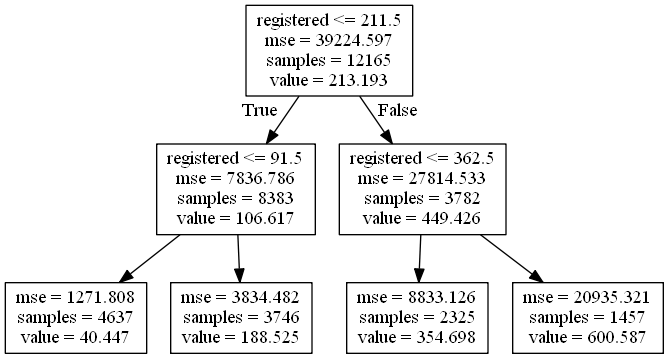

In [57]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 10th Decision Tree in AdaBoost
dot_data = tree.export_graphviz(RegModel.estimators_[8] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

### XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=None, max_depth=10,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[15:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederro

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,Predictedcnt,APE
0,3.0,1.0,6.0,19.0,0.0,6.0,0.0,1.0,0.80,0.6970,0.27,0.1940,240.0,425,387.0,8.941176
1,1.0,1.0,1.0,20.0,1.0,1.0,0.0,1.0,0.24,0.2273,0.41,0.2239,83.0,88,88.0,0.000000
2,4.0,0.0,10.0,2.0,0.0,5.0,1.0,1.0,0.32,0.3030,0.66,0.2836,3.0,4,7.0,75.000000
3,2.0,1.0,5.0,19.0,0.0,2.0,1.0,1.0,0.78,0.7121,0.52,0.3582,457.0,526,532.0,1.140684
4,1.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.26,0.2273,0.56,0.3881,8.0,13,9.0,30.769231


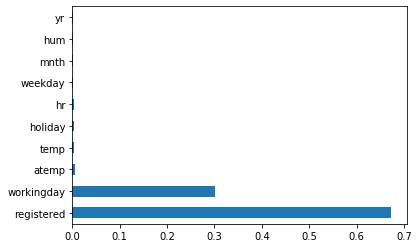

In [89]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, learning_rate=0.15, n_estimators=500, objective='reg:linear', booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=100* ((abs(TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])
MAPE=np.mean(TestingDataResults['APE'])
Accuracy = 100 - MAPE

MedianMAPE=np.median(TestingDataResults['APE'])



MedianAccuracy=100- MedianMAPE
print('Mean Accuracy:', Accuracy)
print('Median Accuracy:', MedianAccuracy)
TestingDataResults.head()

### KNN

In [90]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=10)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=100* ((abs(TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])
MAPE=np.mean(TestingDataResults['APE'])
Accuracy = 100 - MAPE

MedianMAPE=np.median(TestingDataResults['APE'])



MedianAccuracy=100- MedianMAPE
print('Mean Accuracy:', Accuracy)
print('Median Accuracy:', MedianAccuracy)
TestingDataResults.head()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
R2 Value: 0.9808356957291184
Accuracy 89.04526949946279
Mean Accuracy: 89.122429255334
Median Accuracy: 92.69662921348315


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,Predictedcnt,APE
0,3.0,1.0,6.0,19.0,0.0,6.0,0.0,1.0,0.80,0.6970,0.27,0.1940,240.0,425,374.0,12.000000
1,1.0,1.0,1.0,20.0,1.0,1.0,0.0,1.0,0.24,0.2273,0.41,0.2239,83.0,88,90.0,2.272727
2,4.0,0.0,10.0,2.0,0.0,5.0,1.0,1.0,0.32,0.3030,0.66,0.2836,3.0,4,4.0,0.000000
3,2.0,1.0,5.0,19.0,0.0,2.0,1.0,1.0,0.78,0.7121,0.52,0.3582,457.0,526,521.0,0.950570
4,1.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.26,0.2273,0.56,0.3881,8.0,13,8.0,38.461538
